In [1]:
## LIBRARIES ##
import numpy as np                         # Library for Numerical and Matricial Operations
import matplotlib.pyplot as plt            # Library for Generating Visualizations
import pandas as pd                        # Library for Handling Datasets
from tools import Tools as tl        # Library for some Utilitary Tools

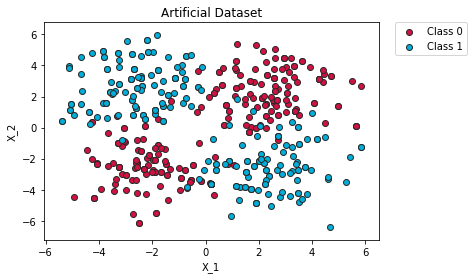

In [2]:
X_train, X_test, y_train, y_test = tl.loadData("../data/toy_data_01.csv")
tl.plotData(X_train, y_train)

In [3]:
## CLASS: Multilayer Perceptron ##
class MultilayerPerceptron:
    
    # CLASS CONSTRUCTOR
    def __init__(self, n_neurons=[2, 5, 1]):
        if(len(n_neurons) < 2):
            raise ValueError("The network must have at least two layers! (The input and the output layers)")
        
        # Network Architecture
        self.hidden_layers = len(n_neurons)-2
        self.n_neurons = n_neurons
        self.W = []
        
        # Adjusting the Network architecture
        for i in range(1, len(n_neurons)):
            self.W.append( np.random.randn(self.n_neurons[i-1]+1 , self.n_neurons[i]) )
        
    # ACTIVATION FUNCTION
    def activate(self,Z):
        return 1 / (1 + np.exp(-Z))
    
    # FORWARD PROPAGATION
    def forward(self, X):
        # Activation List
        A = []
        
        # Input Layer Activation
        A.append( np.vstack([np.ones([1, X.shape[1]]), X]) )
        
        # Hidden Layer Activation
        for i in range(0, self.hidden_layers):
            Z = np.matmul(self.W[i].T, A[-1])
            Z = self.activate(Z)
            
            A.append( np.vstack([np.ones([1, Z.shape[1]]), Z]) )
        
        # Output Layer Activation
        Z = np.matmul(self.W[-1].T, A[-1])
        Z = self.activate(Z)

        A.append(Z)
        
        return A
    
    # CLASSIFICATION PREDICTION
    def predict(self, X):
        A = self.forward(X)
        
        if(self.n_neurons[-1] > 1):
            return A[-1].argmax(axis=0)
        else:
            return (A[-1] > 0.5).astype(int)
    
    # LOSS FUNCTION
    def loss(self, y, y_hat):
        m = y.shape[1]
        return -(1/m) * np.sum(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))
    
    # ACCURACY FUNCTION
    def accuracy(self, y, y_hat):
        m = y.shape[1]
        return (1/m) * np.sum(y == y_hat) * 100
    
    # BACKPROPAGATION
    def backpropagate(self, A, y):
        # A primeira matriz de erros é calculada diretamente da diferença entre a classe real e a prevista
        E = []
        E.append( A[-1] - y )

        # O erro é, então, propagado para trás até termos os erros da primeira Camada oculta
        for i in range(self.hidden_layers, 0, -1):
            E.append( np.matmul(self.W[i], E[-1]) * A[i] * (1-A[i]) )
            E[-1] = E[-1][1:,:]

        # Retornamos o erro calculado em todas as camadas, na ordem inversa do cálculo
        return E[::-1]
    
    # GRADIENT DESCENT TRAINING
    def train(self, X_train, y_train, alpha=1e-3, maxIt=50000, tol=1e-5, verbose=False):
        m = X_train.shape[1]
    
        # Define o Histórico de Erros e algumas variáveis auxiliares
        errorHist = []
        previousLoss = 0

        # Realiza o treino por Gradiente Descendente
        for it in range(0, maxIt):
            # 1. Calculamos a ativação de todos os neurônios (Forward Propagation) e 
            #    retropropagamos o erro da predição (Backpropagation)
            A = self.forward(X_train)
            E = self.backpropagate(A, y_train)
            P = self.predict(X_train)

            # 2. Calculamos o erro MSE, a acurácia do modelo e adicionamos o resultado no histórico.
            actualLoss = self.loss(y_train, A[-1])
            actualAcc = self.accuracy(y_train, P)
            errorHist.append(actualLoss)

            # 3. Realizamos o passo do Gradiente Descendente.        
            for i in range(0, self.hidden_layers+1):
                self.W[i] = self.W[i] - (alpha/m) * np.matmul(A[i], E[i].T)

            # 4. Imprimimos o resultado do treinamento a cada 50 épocas.
            if(it % 50 == 0 and verbose): 
                print("## Iteration", it, "##")
                print("Cross-Entropy Loss: \t", actualLoss)
                print("Accuracy (Training Set): {0:.3f}%".format(actualAcc))
                print("Weights\nS -> H:\n", self.W[0])
                print("\n")

            # 5. Verificamos uma possivel convergência do treinamento, e então encerramos o laço.
            if(abs(actualLoss - previousLoss) <= tol):
                print("!!! Convergence reached !!!")
                print("## Iteration", it, "##")
                print("Cross-Entropy Loss: \t", actualLoss)
                print("Accuracy (Training Set): {0:.3f}%".format(actualAcc))
                print("Weights\nS -> H:\n", self.W[0])
                print("\n")
                break;

            # 6. Atualizamos as variáveis auxiliares para as próximas iterações.
            previousLoss = actualLoss

        # Fim do Treinamento
        return errorHist
        
## ---------------------------- ##

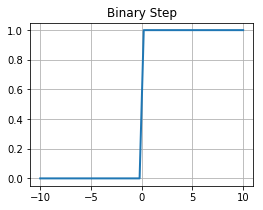

In [4]:
def sig(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(z, 0)

def sign(z):
    return z > 0

X = np.linspace(-10, 10)

plt.figure(figsize=[4, 3])
plt.title("Binary Step")
plt.plot(X, sign(X), linewidth=2)
plt.grid()
plt.show()

In [10]:
brain = MultilayerPerceptron(n_neurons=[2,1])
errorHist = brain.train(X_train, y_train)

!!! Convergence reached !!!
## Iteration 1776 ##
Cross-Entropy Loss: 	 0.6891287241745753
Accuracy (Training Set): 53.333%
Weights
S -> H:
 [[-0.01090648]
 [-0.1021204 ]
 [-0.01533365]]




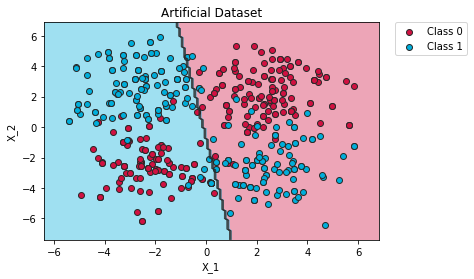

In [11]:
tl.plotClassContour(X_train, y_train, brain)

In [15]:
%matplotlib qt5
tl.plotClassWireframe(X_train, y_train, brain)

In [17]:
brain = MultilayerPerceptron(n_neurons=[2,10,1])
errorHist = brain.train(X_train, y_train)

!!! Convergence reached !!!
## Iteration 15815 ##
Cross-Entropy Loss: 	 0.5114047694048417
Accuracy (Training Set): 88.125%
Weights
S -> H:
 [[-0.95186547 -1.30412818  0.07574757  0.55545529 -0.35731739 -0.02501832
   1.09127039  0.53829583  0.83390351  1.38314973]
 [ 0.3497142  -0.90308823 -1.14425748  0.22225849 -0.77618594 -0.19497746
  -0.59622642 -1.29206348  0.59532983  0.7802743 ]
 [-0.86119347 -0.76530761 -0.30459562  0.77615743 -0.81254225 -0.26697787
  -1.32402973 -0.23497074 -1.37934907 -0.89358259]]




In [18]:
tl.plotClassContour(X_train, y_train, brain)